In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm_notebook

## Задача XOR
Сформируем обучающую выборку

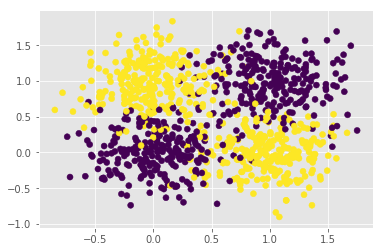

In [28]:
N = 100000
x_1 = np.random.randint(0, 2, N)
x_2 = np.random.randint(0, 2, N)
y = x_1 ^ x_2; y.shape=(N,1)
x_1 = x_1.astype(np.float32) + np.random.normal(0, 0.3, N)
x_2 = x_2.astype(np.float32) + np.random.normal(0, 0.3, N)
plt.scatter(x_1[:1000], x_2[:1000], c = y[:1000])
plt.show()

### Граф вычислений и обучение сети
Многослойный персептрон с двумя скрытыми слоями 

In [29]:
batch_size = 10000
X_tensor = tf.placeholder(dtype=tf.float32, shape=(batch_size, 2))
Y_tensor = tf.placeholder(dtype=tf.float32, shape=(batch_size, 1))

In [30]:
w = np.random.normal(100, 1, 2)
w.shape = (2,1)
hidden_1_size = 15
W_1 = tf.Variable(initial_value=tf.random_normal(shape=(2, hidden_1_size), mean=0, stddev=1), dtype=tf.float32, name="weigths")
Bias_1 = tf.Variable(initial_value=tf.random_normal(shape=(1,hidden_1_size), mean=0.0, stddev=1.0), dtype=tf.float32, name="bias")

H_1 = tf.nn.relu(tf.matmul(X_tensor, W_1) + Bias_1)

W_2 = tf.Variable(initial_value=tf.random_normal(shape=(hidden_1_size, 2), mean=0.0, stddev=1.0), dtype=tf.float32, name="weigths_2")
Bias_2 = tf.Variable(initial_value=tf.random_normal(shape=(1, 2), mean=0.0, stddev=1.0), dtype=tf.float32, name="bias_2")

pred = tf.nn.softmax(tf.matmul(H_1, W_2) + Bias_2)
 
loss = tf.reduce_mean(-tf.reduce_sum(tf.multiply(Y_tensor, tf.log(pred)), axis=1))

loss_reg = loss + 0.3*tf.reduce_sum(W_1**2) + 0.3*tf.reduce_sum(W_2**2)

optimizer = tf.train.AdamOptimizer(0.01).minimize(loss_reg)
errors = []
epochs = 30
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for ep in tqdm_notebook(range(epochs)):
        for i in range(N // batch_size):
            batch = np.column_stack([x_1[i*batch_size:(i+1)*batch_size], x_2[i*batch_size:(i+1)*batch_size]])
            y_batch = y[i*batch_size:(i+1)*batch_size]; y_batch.shape=(batch_size,1)
            _, l  = sess.run([optimizer, loss], {X_tensor: batch, Y_tensor: y_batch})
        errors.append(l)

### График функции потерь на обучении

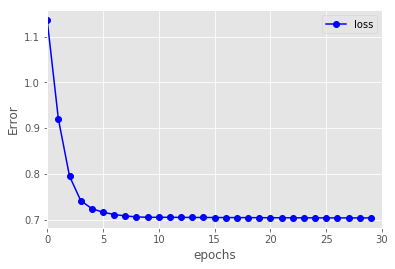

In [39]:
plt.plot(errors, '-o', c='b', label='loss')
plt.ylabel('Error')
plt.xlabel('epochs')
plt.xlim(0,len(errors))
plt.legend()
plt.show()